# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [75]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(10,10))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()


In [76]:
leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [99]:
url = "data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv"
noadata = pd.read_csv(url)
noadata.Date = pd.to_datetime(noadata.Date)
noadata.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [100]:
import numpy as np

In [101]:
noadata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null datetime64[ns]
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.0+ MB


In [102]:
noadata.sort_values(by = 'Date', inplace=True)
noadata.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [103]:
noadata['Date'][1].day

29

In [104]:
noadata['Month'] = noadata['Date'].apply(lambda x: x.month)
noadata['Year'] = noadata['Date'].apply(lambda x: x.year)
noadata['Day'] = noadata['Date'].apply(lambda x: x.day)

In [105]:
noadata.tail()

,ID,Date,Element,Data_Value,Month,Year,Day
45691,USC00200032,2015-12-31,TMAX,11,12,2015,31
10573,USC00205050,2015-12-31,TMIN,-17,12,2015,31
21088,USC00208202,2015-12-31,TMAX,0,12,2015,31
10253,USC00201250,2015-12-31,TMIN,-6,12,2015,31
29410,USC00200230,2015-12-31,TMIN,-17,12,2015,31


In [106]:
noadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165085 entries, 60995 to 29410
Data columns (total 7 columns):
ID            165085 non-null object
Date          165085 non-null datetime64[ns]
Element       165085 non-null object
Data_Value    165085 non-null int64
Month         165085 non-null int64
Year          165085 non-null int64
Day           165085 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 10.1+ MB


In [107]:
noadata.shape # & (noadata.Year!= 2015)

(165085, 7)

In [108]:
#convert temperature from tenths of degree C to degree C
noadata['Data_Value']=0.1*noadata.Data_Value


In [118]:
# Lis years. We find out 2 years 2008 and 2012
np.unique(noadata[(noadata['Day'] == 29)&(noadata['Month'] == 2)]['Year'])

array([2008, 2012])

In [115]:
#Remove 29th February
noadata1 = noadata[~ noadata['Date'].isin(['2012-02-29', '2008-02-29'])]

In [116]:
noadata1[noadata1['Month'] == 2]

,ID,Date,Element,Data_Value,Month,Year,Day
125560,USC00208080,2005-02-01,TMAX,0.0,2,2005,1
135098,USC00200842,2005-02-01,TMAX,-1.7,2,2005,1
128184,USC00200032,2005-02-01,TMAX,-1.1,2,2005,1
125562,USC00208080,2005-02-01,TMIN,-15.0,2,2005,1
136153,USC00201502,2005-02-01,TMIN,-16.7,2,2005,1
128190,USC00200032,2005-02-01,TMIN,-12.2,2,2005,1
141642,USC00205050,2005-02-01,TMAX,0.0,2,2005,1
131630,USC00205451,2005-02-01,TMAX,1.1,2,2005,1
141647,USC00205050,2005-02-01,TMIN,-15.0,2,2005,1
135009,USC00205563,2005-02-01,TMIN,-11.1,2,2005,1


In [119]:
noadata_2015 = noadata[noadata.Year == 2015]
noadata_2015.head()

,ID,Date,Element,Data_Value,Month,Year,Day
43095,USW00014833,2015-01-01,TMIN,-8.8,1,2015,1
51805,USC00208972,2015-01-01,TMAX,-6.7,1,2015,1
43140,USC00202308,2015-01-01,TMIN,-10.6,1,2015,1
43653,USC00200228,2015-01-01,TMAX,-5.0,1,2015,1
43652,USC00200228,2015-01-01,TMIN,-8.9,1,2015,1


In [120]:
noadata_2015.shape

(13757, 7)

In [121]:
noadata_2005_to_2014 = noadata1[noadata1['Year'] != 2015]

In [122]:
noadata_min_max = noadata_2005_to_2014.groupby(['Element','Month', 'Day'])['Data_Value'].agg({'Max_Data_Value': 'max', 'Min_Data_Value': 'min'})
noadata_min_max

Max_Data_Value  Min_Data_Value
Element Month Day                                
TMAX    1     1              15.6            -9.3
              2              13.9           -10.0
              3              13.3           -11.7
              4              10.6           -10.0
              5              12.8            -5.0
              6              18.9            -8.2
              7              21.7           -18.9
              8              19.4           -19.4
              9              17.8           -17.8
              10             10.0            -5.6
              11             15.6            -6.1
              12             16.1            -6.7
              13             16.7            -6.1
              14             15.0           -11.7
              15              6.7           -13.8
              16              9.4           -18.2
              17             13.3           -17.8
              18             12.2           -11.7
              19             10.6            -8.9
              20             13.3           -11.1
              21             13.3           -12.1
              22             11.7           -13.3
              23             12.8           -13.3
              24             11.7           -14.4
              25             10.0           -11.1
              26              8.9            -9.4
              27              7.8            -9.4
              28             12.2           -16.0
              29             17.8           -15.6
              30             18.3            -8.9
...                           ...             ...
TMIN    12    2              11.7           -13.3
              3              10.0           -10.0
              4              10.6           -12.2
              5               6.1           -15.5
              6               2.2           -18.3
              7               2.8           -19.4
              8               4.4           -20.0
              9               2.8           -18.9
              10              4.4           -17.2
              11              6.1           -16.7
              12              5.6           -21.0
              13              5.0           -17.8
              14              8.3           -16.1
              15              6.7           -16.6
              16              7.8           -22.8
              17              8.3           -22.2
              18              4.4           -19.4
              19              2.8           -16.1
              20              4.4           -16.7
              21              4.4           -19.4
              22              5.6           -20.0
              23              5.6           -20.0
              24              8.9           -16.7
              25              5.6           -16.7
              26              1.7           -15.6
              27              9.4           -13.8
              28              6.1           -16.6
              29              2.2           -15.0
              30              1.7           -14.4
              31              6.7           -15.0

[730 rows x 2 columns]

In [123]:
record_max=noadata_min_max.loc['TMAX'].Max_Data_Value
record_max.head()

Month  Day
1      1      15.6
       2      13.9
       3      13.3
       4      10.6
       5      12.8
Name: Max_Data_Value, dtype: float64

In [124]:
record_min=noadata_min_max.loc['TMIN'].Min_Data_Value
record_min.head()

Month  Day
1      1     -16.0
       2     -26.7
       3     -26.7
       4     -26.1
       5     -15.0
Name: Min_Data_Value, dtype: float64

In [125]:
noadata_2015_min_max=noadata_2015.groupby(['Element','Month', 'Day'])['Data_Value'].agg({'Max_Data_Value2015': 'max', 'Min_Data_Value2015': 'min'})

noadata_2015_min_max

Max_Data_Value2015  Min_Data_Value2015
Element Month Day                                        
TMAX    1     1                   1.1                -6.7
              2                   3.9                -2.2
              3                   3.9                 0.0
              4                   4.4                 0.0
              5                   2.8                -8.8
              6                   3.3               -11.7
              7                  -6.7               -11.7
              8                  -8.2               -14.4
              9                  -6.6                -9.4
              10                 -7.1               -11.7
              11                  0.6                -6.1
              12                  0.6                -2.1
              13                  0.0               -11.1
              14                 -5.6               -12.1
              15                 -0.5               -10.6
              16                  0.6                -3.3
              17                  7.8                -3.9
              18                  8.3                 3.9
              19                  6.7                 1.1
              20                  3.9                -0.6
              21                  2.2                -2.8
              22                 -0.5                -3.9
              23                  1.1                -3.3
              24                  4.4                -1.1
              25                  3.3                 1.1
              26                  2.8                -4.4
              27                 -0.5                -3.9
              28                  0.6                -3.9
              29                  3.9                -1.7
              30                  2.8                -3.2
...                               ...                 ...
TMIN    12    2                  -0.6                -6.1
              3                   2.2                -7.8
              4                   0.6                -4.3
              5                  -1.1                -5.0
              6                  -1.0                -5.6
              7                  -1.1                -6.7
              8                   2.2                -6.7
              9                   3.3                -3.3
              10                  4.4                -4.4
              11                  6.7                 0.0
              12                 10.0                 2.8
              13                 14.4                 6.7
              14                 14.4                 6.1
              15                  6.7                 3.9
              16                  6.7                 0.6
              17                  2.2                -1.1
              18                  0.0                -5.0
              19                 -2.8                -6.7
              20                 -4.4                -9.4
              21                  5.6                -8.3
              22                  6.7                 0.6
              23                  5.0                 0.0
              24                  6.7                 0.0
              25                  6.1                -3.2
              26                  3.9                -3.9
              27                  3.3                -0.6
              28                  0.6                -3.9
              29                  2.8                -3.9
              30                  1.7                -2.2
              31                  0.0                -5.6

[730 rows x 2 columns]

In [126]:
noadata_2015_min_max.index.get_level_values(2)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Day', length=730)

In [127]:
record_2015_max=noadata_2015_min_max.loc['TMAX'].Max_Data_Value2015
record_2015_min=noadata_2015_min_max.loc['TMIN'].Min_Data_Value2015

In [128]:
(len(record_2015_max), len(record_2015_min))

(365, 365)

In [129]:
(len(record_max), len(record_min))

(365, 365)

In [134]:
Join_df = pd.merge(noadata_min_max, noadata_2015_min_max, how = 'outer', left_index = True, right_index = True)

In [135]:
Join_df

Max_Data_Value  Min_Data_Value  Max_Data_Value2015  \
Element Month Day                                                       
TMAX    1     1              15.6            -9.3                 1.1   
              2              13.9           -10.0                 3.9   
              3              13.3           -11.7                 3.9   
              4              10.6           -10.0                 4.4   
              5              12.8            -5.0                 2.8   
              6              18.9            -8.2                 3.3   
              7              21.7           -18.9                -6.7   
              8              19.4           -19.4                -8.2   
              9              17.8           -17.8                -6.6   
              10             10.0            -5.6                -7.1   
              11             15.6            -6.1                 0.6   
              12             16.1            -6.7                 0.6   
              13             16.7            -6.1                 0.0   
              14             15.0           -11.7                -5.6   
              15              6.7           -13.8                -0.5   
              16              9.4           -18.2                 0.6   
              17             13.3           -17.8                 7.8   
              18             12.2           -11.7                 8.3   
              19             10.6            -8.9                 6.7   
              20             13.3           -11.1                 3.9   
              21             13.3           -12.1                 2.2   
              22             11.7           -13.3                -0.5   
              23             12.8           -13.3                 1.1   
              24             11.7           -14.4                 4.4   
              25             10.0           -11.1                 3.3   
              26              8.9            -9.4                 2.8   
              27              7.8            -9.4                -0.5   
              28             12.2           -16.0                 0.6   
              29             17.8           -15.6                 3.9   
              30             18.3            -8.9                 2.8   
...                           ...             ...                 ...   
TMIN    12    2              11.7           -13.3                -0.6   
              3              10.0           -10.0                 2.2   
              4              10.6           -12.2                 0.6   
              5               6.1           -15.5                -1.1   
              6               2.2           -18.3                -1.0   
              7               2.8           -19.4                -1.1   
              8               4.4           -20.0                 2.2   
              9               2.8           -18.9                 3.3   
              10              4.4           -17.2                 4.4   
              11              6.1           -16.7                 6.7   
              12              5.6           -21.0                10.0   
              13              5.0           -17.8                14.4   
              14              8.3           -16.1                14.4   
              15              6.7           -16.6                 6.7   
              16              7.8           -22.8                 6.7   
              17              8.3           -22.2                 2.2   
              18              4.4           -19.4                 0.0   
              19              2.8           -16.1                -2.8   
              20              4.4           -16.7                -4.4   
              21              4.4           -19.4                 5.6   
              22              5.6           -20.0                 6.7   
              23              5.6           -20.0                 5.0   
    

In [136]:
# Find if it exist missing values from the joined dataframe
Join_df[Join_df.isnull().any(axis=1)]

,,,Max_Data_Value,Min_Data_Value,Max_Data_Value2015,Min_Data_Value2015
Element,Month,Day,,,,


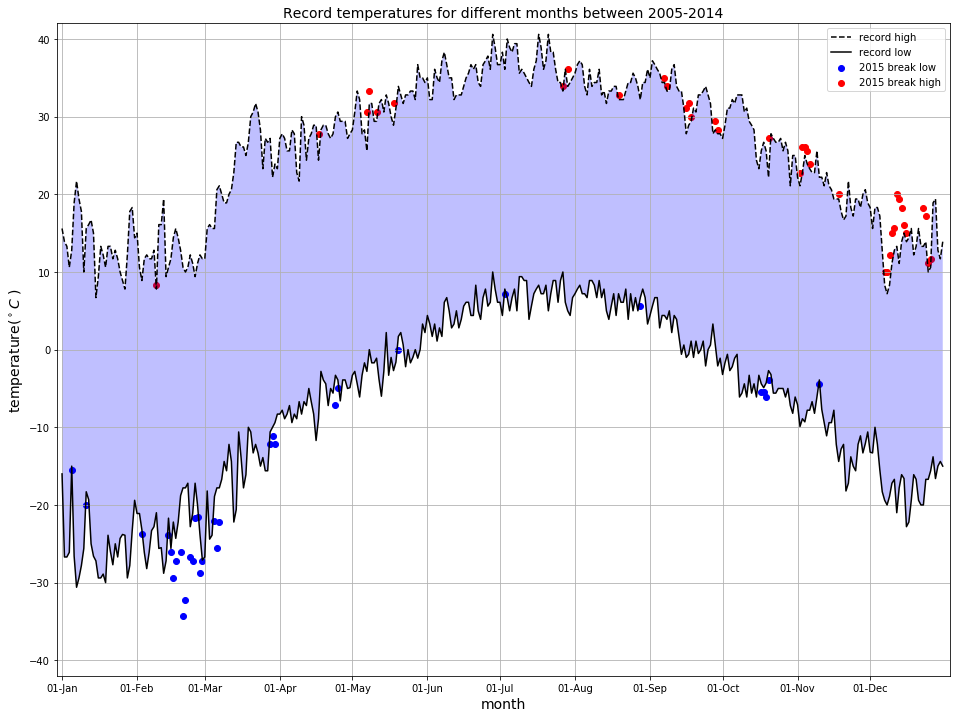

In [143]:
plt.figure(figsize=(16,12)) 
plt.plot(np.arange(len(record_max)),record_max, '--k', label="record high") 
plt.plot(np.arange(len(record_max)),record_min, '-k',label="record low") 
plt.scatter(np.where(record_2015_min < record_min.values),  record_2015_min[record_2015_min < record_min].values,c='b',label='2015 break low')
plt.scatter(np.where(record_2015_max > record_max.values),  record_2015_max[record_2015_max > record_max].values,c='r',label='2015 break high') 
plt.xlabel('month',size=14) 
plt.ylabel('temperature($^\circ C$ )',size=14)
tick = [0,31,59,90,120,151,181,212,243,273,304,334]
plt.xticks(tick, ['01-Jan','01-Feb', '01-Mar','01-Apr','01-May','01-Jun','01-Jul','01-Aug','01-Sep','01-Oct','01-Nov','01-Dec']) 
ax=plt.gca() 
ax.axis([-2,367,-42,42]) 
plt.gca().fill_between(np.arange(0,365),record_min, record_max, facecolor='blue',alpha=0.25) 
plt.title('Record temperatures for different months between 2005-2014',size=14) 
plt.grid()
plt.legend(loc=0) 
plt.show()